In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
rawtxt = pd.read_csv('miRNA_targets_hsa.txt',sep='\t',engine='c',error_bad_lines=False)
tarscan = rawtxt[rawtxt["tool name"]=="TargetScan"]
tarscan

,mature miRNA,Ensembl transcript ID,target start,tsrget end,miRNA 3-5,alinment,target 5-3,tool name,criterion 1,criterion 2,criterion 3
0,hsa-let-7a,ENST00000344008,167,174,-------------------UUGAUAUGUUGGAU--GAUGGAGU,|| ||:| :|: ||||||||,GGGUGAUGUCCUUCUAGCCAAAGAUGCUGCUGCUCCUACCUCAC,TargetScan,3,1,1
1,hsa-let-7a,ENST00000377015,167,174,-------------------UUGAUAUGUUGGAU--GAUGGAGU,|| ||:| :|: ||||||||,GGGUGAUGUCCUUCUAGCCAAAGAUGCUGCUGCUCCUACCUCAC,TargetScan,3,1,0
2,hsa-let-7a,ENST00000374673,3606,3613,---------UUGAUAUGU---UGGAU---------GAUGGAGU,::||| ||: ||| |||||||:,UGUGCCCCCGGCUACACGCGCACCGGGAGUGGGCUCUACCUCGG,TargetScan,2,2,0
3,hsa-let-7a,ENST00000374673,5007,5014,U--------------------UGAUAU--GUUGGAUGAUGGAGU,:||: |::|:| |||||||,CUCAUCCCAGCCAUCACGACUGCUGACGCCGGCUU-CUACCUCU,TargetScan,2,2,0
4,hsa-let-7a,ENST00000311538,3713,3720,---------UUGAUAUGU---UGGAU---------GAUGGAGU,::||| ||: ||| |||||||:,UGUGCCCCCGGCUACACGCGCACCGGGAGUGGGCUCUACCUCGG,TargetScan,2,2,0
5,hsa-let-7a,ENST00000311538,5114,5121,U--------------------UGAUAU--GUUGGAUGAUGGAGU,:||: |::|:| |||||||,CUCAUCCCAGCCAUCACGACUGCUGACGCCGGCUU-CUACCUCU,TargetScan,2,2,1
6,hsa-let-7a,ENST00000374498,106,113,U----------UGAUA-UG--------UUGGAU--GAUGGAGU,:||: :| ::||| ||||||||,GCCCUGGAGCUGCUGGGGCCAAGCCAAGGCCUCCCCUACCUCAA,TargetScan,3,1,0
7,hsa-let-7a,ENST00000313298,106,113,U----------UGAUA-UG--------UUGGAU--GAUGGAGU,:||: :| ::||| ||||||||,GCCCUGGAGCUGCUGGGGCCAAGCCAAGGCCUCCCCUACCUCAA,TargetScan,3,1,0
8,hsa-let-7a,ENST00000374497,106,113,U----------UGAUA-UG--------UUGGAU--GAUGGAGU,:||: :| ::||| ||||||||,GCCCUGGAGCUGCUGGGGCCAAGCCAAGGCCUCCCCUACCUCAA,TargetScan,3,1,1
9,hsa-let-7a,ENST00000311772,264,271,UU---------------------GAUAUGUU-GGAUGAUGGAGU,||| :| || ||||||||,CAAUAGACUGCCCUGGCUCUUUCCUAGGCCUUCC-ACUACCUCC,TargetScan,3,1,1


In [3]:
shuffle(tarscan)[["miRNA 3-5","target 5-3"]].reset_index(drop=True).drop_duplicates().to_csv('tarscan.csv', index = False)

In [5]:
mirlen = []
genelen = []

for l in open('tarscan.csv', 'r'):
    #if count<3:
        (a, b) = l.strip().split(",")
        mirlen.append(len(a))
        genelen.append(len(b))
        
mirlen = mirlen[1:]
genelen = genelen[1:]

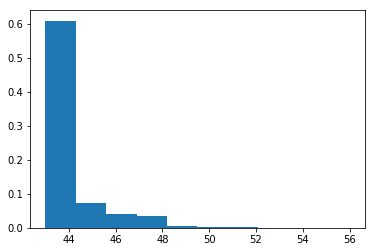

In [6]:
import matplotlib
from numpy.random import randn
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100 * y)

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

x = mirlen

# Make a normed histogram. It'll be multiplied by 100 later.
plt.hist(x,normed=True)

# Create the formatter using the function to_percent. This multiplies all the
# default labels by 100, making them all percentages
#formatter = FuncFormatter(to_percent)

# Set the formatter
#plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

In [7]:
pd.Series(mirlen).value_counts()

43    81555
44    26754
45    12859
46     7076
47     4119
48     2141
49     1037
50      543
51      292
52      127
53       80
54       10
55        3
56        1
dtype: int64

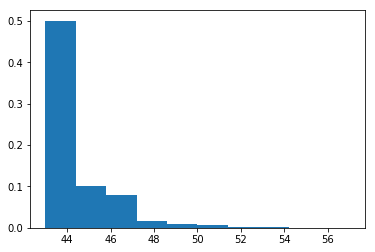

In [8]:
x = genelen
plt.hist(x,normed=True)
plt.show()

In [9]:
pd.Series(genelen).value_counts()

44    52321
43    43367
45    19430
46     9723
47     5542
48     3085
49     1556
50      799
51      402
52      214
53      109
54       40
55        7
57        1
56        1
dtype: int64

In [10]:
len(tarscan.drop_duplicates())

244389

In [13]:
tarscan

,mature miRNA,Ensembl transcript ID,target start,tsrget end,miRNA 3-5,alinment,target 5-3,tool name,criterion 1,criterion 2,criterion 3
0,hsa-let-7a,ENST00000344008,167,174,-------------------UUGAUAUGUUGGAU--GAUGGAGU,|| ||:| :|: ||||||||,GGGUGAUGUCCUUCUAGCCAAAGAUGCUGCUGCUCCUACCUCAC,TargetScan,3,1,1
1,hsa-let-7a,ENST00000377015,167,174,-------------------UUGAUAUGUUGGAU--GAUGGAGU,|| ||:| :|: ||||||||,GGGUGAUGUCCUUCUAGCCAAAGAUGCUGCUGCUCCUACCUCAC,TargetScan,3,1,0
2,hsa-let-7a,ENST00000374673,3606,3613,---------UUGAUAUGU---UGGAU---------GAUGGAGU,::||| ||: ||| |||||||:,UGUGCCCCCGGCUACACGCGCACCGGGAGUGGGCUCUACCUCGG,TargetScan,2,2,0
3,hsa-let-7a,ENST00000374673,5007,5014,U--------------------UGAUAU--GUUGGAUGAUGGAGU,:||: |::|:| |||||||,CUCAUCCCAGCCAUCACGACUGCUGACGCCGGCUU-CUACCUCU,TargetScan,2,2,0
4,hsa-let-7a,ENST00000311538,3713,3720,---------UUGAUAUGU---UGGAU---------GAUGGAGU,::||| ||: ||| |||||||:,UGUGCCCCCGGCUACACGCGCACCGGGAGUGGGCUCUACCUCGG,TargetScan,2,2,0
5,hsa-let-7a,ENST00000311538,5114,5121,U--------------------UGAUAU--GUUGGAUGAUGGAGU,:||: |::|:| |||||||,CUCAUCCCAGCCAUCACGACUGCUGACGCCGGCUU-CUACCUCU,TargetScan,2,2,1
6,hsa-let-7a,ENST00000374498,106,113,U----------UGAUA-UG--------UUGGAU--GAUGGAGU,:||: :| ::||| ||||||||,GCCCUGGAGCUGCUGGGGCCAAGCCAAGGCCUCCCCUACCUCAA,TargetScan,3,1,0
7,hsa-let-7a,ENST00000313298,106,113,U----------UGAUA-UG--------UUGGAU--GAUGGAGU,:||: :| ::||| ||||||||,GCCCUGGAGCUGCUGGGGCCAAGCCAAGGCCUCCCCUACCUCAA,TargetScan,3,1,0
8,hsa-let-7a,ENST00000374497,106,113,U----------UGAUA-UG--------UUGGAU--GAUGGAGU,:||: :| ::||| ||||||||,GCCCUGGAGCUGCUGGGGCCAAGCCAAGGCCUCCCCUACCUCAA,TargetScan,3,1,1
9,hsa-let-7a,ENST00000311772,264,271,UU---------------------GAUAUGUU-GGAUGAUGGAGU,||| :| || ||||||||,CAAUAGACUGCCCUGGCUCUUUCCUAGGCCUUCC-ACUACCUCC,TargetScan,3,1,1


In [15]:
targetscan = pd.read_csv('tarscan.csv')
len(targetscan) #.drop_duplicates())

136597

In [25]:
def parse_seq_r(a,maxlen):
    a=a[::-1]
    encode = {'A':[1,0.1,0.1,0.1],'C':[0.1,1,0.1,0.1],'G':[0.1,0.1,1,0.1],'-':[0.1,0.1,0.1,0.1],'U':[0.1,0.1,0.1,1],'N':[0,0,0,0]}
    out = np.zeros([maxlen,4])
    for idx, nt in enumerate(a):
        out[idx]=encode[nt]
    return out

In [16]:
a = '12345'
a[::-1]

'54321'

In [20]:
mi43=[]
ge43=[]
for l in open('tarscan.csv', 'r'):
    #if count<3:
        (a, b) = l.strip().split(",")
        if len(a)==43 and len(b)==43:
            mi43.append(a)
            ge43.append(b)

In [21]:
len(mi43)

43367

In [22]:
len(ge43)

43367

In [30]:
tenz = np.zeros([2,len(ge43),43,4])
for i in range(len(ge43)):
    tenz[0,i] = parse_seq_r(mi43[i],43)
    tenz[1,i] = parse_seq_r(ge43[i],43)

In [32]:
np.save('mi43ge',tenz)